In [1]:
# Import necessary packages
import numpy as np
from numpy import dtype
import netCDF4 as nc
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn
import scipy as scipy
from scipy import stats,signal
from datetime import date
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cftime
import pingouin as pg
import csv
import os
import glob
import dask
import ipympl
import IPython

/data/keeling/a/mgraber2/miniconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
%matplotlib inline

/data/keeling/a/mgraber2/miniconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
# Data imported from SPC database
Years = np.array([1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
# Tornado Days
days = np.array([149,150,136,130,138,158,137,149,148,136,150,169,167,187,162,173,131,162,137,136,155,141,154,156,121,120,126,105,125,108,121,123,134,125,108,99,115,99,128,117,114,105,94,96,119,102,104,97,110,101,99,110,96,80]) #,91,99,100,127,108,116,102,114,99])

# Tornado Outbreaks
outbreak = np.array([0,0,0,0,0,1,0,2,1,0,0,0,0,2,1,1,1,0,0,1,0,0,1,0,3,1,0,0,2,0,2,1,4,0,0,1,1,1,0,3,1,2,2,2,3,1,2,2,3,2,2,8,2,2]) #,2,0,0,4,0,4,3,1,2])

# Tornado Reports
Reports = np.array([491, 567, 476, 378, 550, 670, 424, 658, 476, 422, 507, 716, 573, 896, 750, 617, 607, 625, 464, 506, 609, 503, 692, 588, 552, 396, 423, 322, 421, 503, 614, 454, 612, 450, 400, 427, 436, 411, 557, 528, 356, 418, 328, 511, 617, 452, 440, 435, 741, 473, 539, 956, 379, 431, 428, 508, 427, 772, 500, 713, 539, 586, 612])
#days = np.array([19,11,9,7,4,11,6,14,3,5,11,12,12,20,19,21,12,7,6,9,6,9,7,3,9,7,6,9,3,5,17,9,2,9,3,8,6,3,10,9,7,2,6,10,9,5,12,1,11,7,6,11,7,8,7,14,6,11,4,9,8,11])

# warm season EF2+ days
warmdaysEF2 = np.array([53, 57, 61, 48, 57, 64, 52, 51, 46, 58, 57, 60, 46, 53, 56, 59, 49, 52, 46, 31, 46, 51, 49, 37, 35, 30, 33, 25, 19, 34, 44, 30, 22, 29, 31, 33, 32, 18, 27, 29, 21, 27, 15, 30, 24, 18, 20, 15, 31, 30, 29, 33, 15, 20, 24, 21, 25, 23, 22, 28, 16, 18, 27])
# Annual EF2+ days
EF2CONUS = np.array([89, 112, 83, 79, 93, 106, 84, 92, 93, 91, 109, 113, 90, 112, 91, 102, 75, 91, 63, 63, 68, 73, 82, 76, 57, 46, 66, 40, 42, 51, 67, 47, 47, 48, 47, 47, 55, 37, 50, 55, 37, 46, 35, 36, 48, 38, 44, 37, 57, 46, 49, 54, 34, 34, 35, 35, 48, 56, 42, 45, 35, 36, 49])
df = pd.DataFrame({'days':days}) #, 'EF2':warmdaysEF2, 'EF2C':EF2CONUS, 'reports':reports})
#wdroll = df['EF2'].rolling(15, center=True, min_periods=7).mean()
#wdroll2 = df['EF2C'].rolling(15, center=True, min_periods=7).mean()
wdroll3 = df['days'].rolling(15, center=True, min_periods=7).mean()
#r_roll = df['reports'].rolling(15, center=True, min_periods=7).mean()

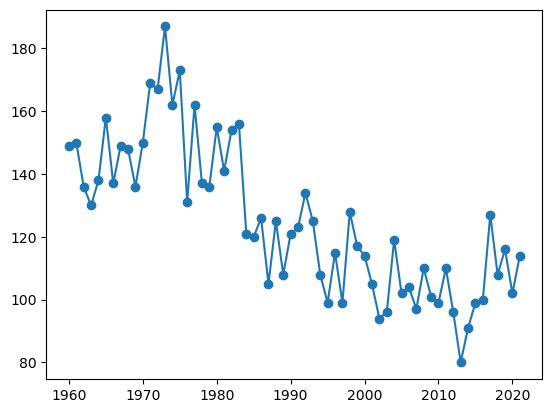

In [3]:
plt.plot(Years, days, marker = 'o', label = 'Tornado Days')

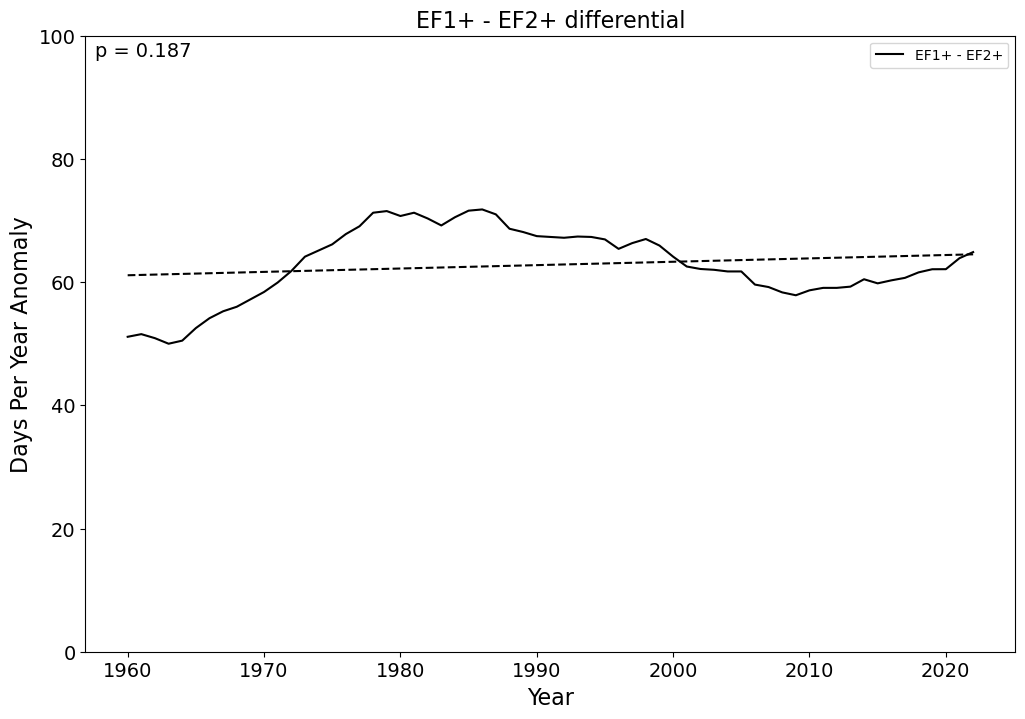

In [18]:
diff = wdroll3-wdroll2

z1 = np.polyfit(Years, diff, 1)
p1 = np.poly1d(z1)

fig, ax1 = plt.subplots(figsize=(12, 8))
#ax2 = ax1.twinx()

#a,b = np.polyfit(Years, days, 1)
#c,d = np.polyfit(Years, outbreak, 1)
#ax1.scatter(Years, EF2CONUS, marker ='o', color = 'b', label = 'Tornado Days')
#ax1.plot(Years, wdroll2, color = 'b', label='EF2+ Tornado Days')
#ax1.plot(Years, wdroll3, color = 'r', label='EF1+ Tornado Days')
ax1.plot(Years, diff, color='k', label='EF1+ - EF2+')
ax1.plot(Years, p1(Years), color='k', linestyle='--')
ax1.set_xlabel("Year", size=16)
ax1.set_ylim(0,100)
#ax1.set_yticks([0,20,40,60,80,100,120,140,160,180,200])
ax1.set_ylabel("Days Per Year Anomaly", size=16)
ax1.tick_params(labelsize=14)
ax1.text(.01, .99, 'p = 0.187', ha='left', va='top', size=14, transform=ax1.transAxes)
#ax2.scatter(Years, outbreak, marker ='v', color = 'r', label = 'Outbreaks')
#ax2.plot(Years, c*Years+d, color = 'r')
#ax2.set_ylabel('Days Per Year')
#ax2.set_ylim(0,10)
plt.title('EF1+ - EF2+ differential', size=16) # vs More than 20 (E)F1+ Tornadoes (red)')
plt.legend()
#plt.grid()
plt.show()

In [7]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Years,reports)
print(slope)
print(p_value)

-0.32152457757296465
0.7230413442919801


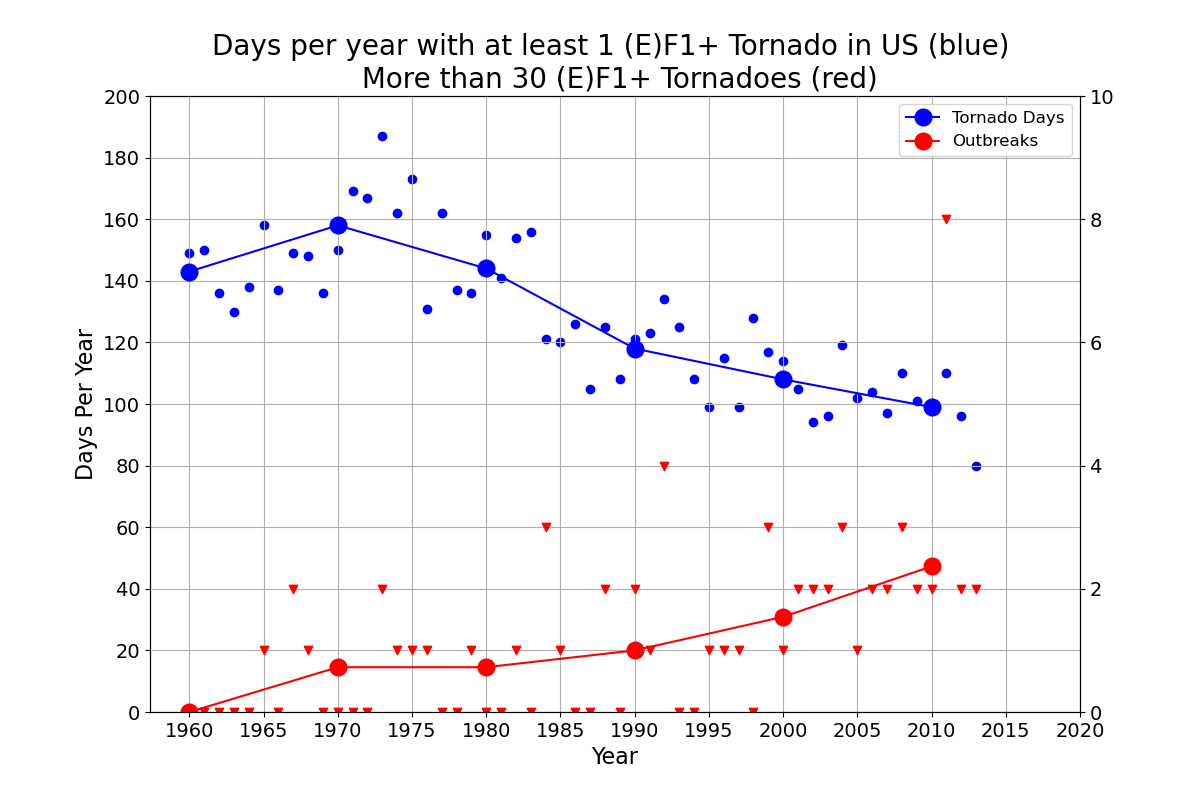

In [29]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()
yearss = [1960,1970,1980,1990,2000,2010]
#yearsss = [2010,2017]
outaverage = [0, 0.727,0.727,1,1.545,2.364]
#outaverage2 = [2.364, 1.82]
dayaverage = [143,158,144,118,108,99]
#dayaverage2 = [99, 102.9]
#curve1 = np.poly1d(np.polyfit(Years, days, 5))
#curve2 = model5 = np.poly1d(np.polyfit(Years, outbreak, 5))
ax1.scatter(Years, days, marker ='o', color = 'b')
#ax1.plot(Years, curve1(Years), color= 'b')
lns1=ax1.plot(yearss,dayaverage,marker='o',color='b',markersize='12', label = 'Tornado Days')
#ax1.plot(yearsss,dayaverage2,marker='o',color='b',fillstyle='none',markersize='14')
ax1.set_xlabel("Year", size ='16')
ax1.set_ylim(0,200)
ax1.set_yticks([0,20,40,60,80,100,120,140,160,180,200])
ax1.set_ylabel("Days Per Year", fontsize = '16')
ax2.scatter(Years, outbreak, marker ='v', color = 'r')
lns2=ax2.plot(yearss,outaverage,marker='o',color='r', markersize='12', label = 'Outbreaks')
#ax2.plot(yearsss,outaverage2,marker='o',color='r',fillstyle='none',markersize='14')
#ax2.plot(Years, curve2(Years), color= 'r')
ax2.set_ylim(0,10)
ax2.set_xticks([1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020])
plt.title('Days per year with at least 1 (E)F1+ Tornado in US (blue) \n More than 30 (E)F1+ Tornadoes (red)', fontsize = '20')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, fontsize='12')

ax1.tick_params(labelsize='14')
ax2.tick_params(labelsize='14')

ax1.grid(which = 'both', axis = 'both')
plt.show()

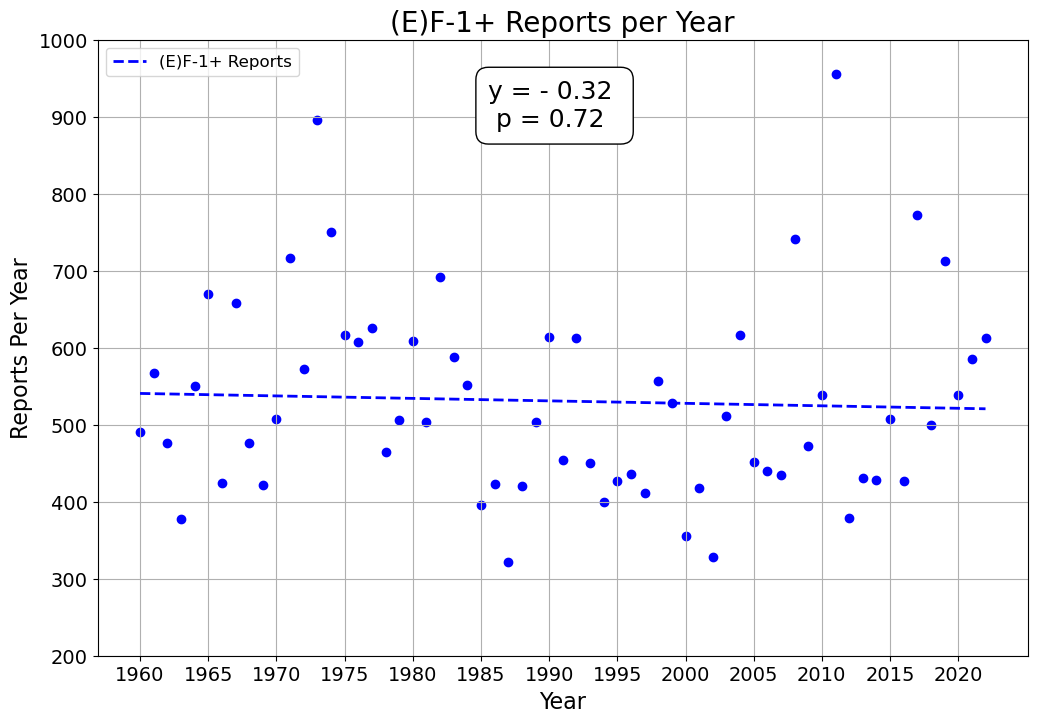

In [10]:
z1 = np.polyfit(Years, reports, 1)
p1 = np.poly1d(z1)

fig, ax1 = plt.subplots(figsize=(12, 8))
#ax2 = ax1.twinx()
#yearss = [1960,1970,1980,1990,2000,2010]
#yearsss = [2010,2017]
#outaverage = [0, 0.727,0.727,1,1.545,2.364]
#outaverage2 = [2.364, 1.82]
#dayaverage = [143,158,144,118,108,99]
#dayaverage2 = [99, 102.9]
#curve1 = np.poly1d(np.polyfit(Years, days, 5))
#curve2 = model5 = np.poly1d(np.polyfit(Years, outbreak, 5))
ax1.scatter(Years, reports, marker ='o', color = 'b')
ax1.plot(Years, p1(Years), color='b', label='(E)F-1+ Reports', linewidth=2, linestyle='--')
#ax1.plot(Years, curve1(Years), color= 'b')
#lns1=ax1.plot(yearss,dayaverage,marker='o',color='b',markersize='12', label = 'Tornado Days')
#ax1.plot(yearsss,dayaverage2,marker='o',color='b',fillstyle='none',markersize='14')
ax1.set_xlabel("Year", size ='16')
ax1.set_ylim(200,1000)
#ax1.set_yticks([0,20,40,60,80,100,120,140,160,180,200])
ax1.set_ylabel("Reports Per Year", fontsize = '16')
#ax2.scatter(Years, outbreak, marker ='v', color = 'r')
#lns2=ax2.plot(yearss,outaverage,marker='o',color='r', markersize='12', label = 'Outbreaks')
#ax2.plot(yearsss,outaverage2,marker='o',color='r',fillstyle='none',markersize='14')
#ax2.plot(Years, curve2(Years), color= 'r')
#ax2.set_ylim(0,10)
ax1.set_xticks([1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020])
ax1.text(.42, .935, 'y = - 0.32 \n p = 0.72', ha='left', va='top', size=18, transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.title('(E)F-1+ Reports per Year', fontsize = '20')

#lns = lns1+lns2
#labs = [l.get_label() for l in lns]
ax1.legend(loc=0, fontsize='12')

ax1.tick_params(labelsize='14')
#ax2.tick_params(labelsize='14')

ax1.grid(which = 'both', axis = 'both')
plt.show()

In [10]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Years,reports)
print(slope)
print(p_value)

-0.5561635944700465
0.5229128699082226


In [5]:
print(np.mean(outbreak))

1.2698412698412698


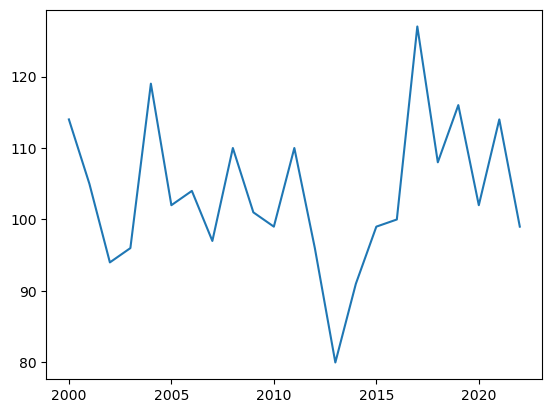

In [2]:
Years = np.array([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
numbers = np.array([114,105,94,96,119,102,104,97,110,101,99,110,96,80,91,99,100,127,108,116,102,114,99])
plt.plot(Years,numbers)

In [22]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Years,Reports)
print(slope)
print(p_value)

-0.321524577572965
0.7230413442919799


In [4]:
reports = np.array([488, 543, 466, 365, 535, 651, 416, 645, 465, 413, 489, 701, 567, 883, 723, 612, 593, 616, 451, 496, 599, 499, 673, 580, 534, 376, 411, 316, 419, 487, 596, 444, 599, 439, 388, 415, 430, 405, 541, 509, 352, 405, 311, 483, 601, 448, 417, 422, 707, 453, 511, 896, 362, 405, 410, 481, 415, 734, 491, 684, 517, 555, 591]) 
fatalities = np.array([46, 52, 30, 31, 73, 300, 98, 114, 131, 66, 73, 159, 26, 89, 366, 60, 44, 43, 52, 84, 28, 24, 64, 32, 122, 94, 15, 59, 32, 50, 53, 38, 39, 31, 69, 29, 24, 68, 130, 94, 41, 39, 55, 53, 35, 38, 67, 81, 126, 21, 45, 553, 68, 55, 47, 36, 17, 35, 9, 42, 76, 104, 23])

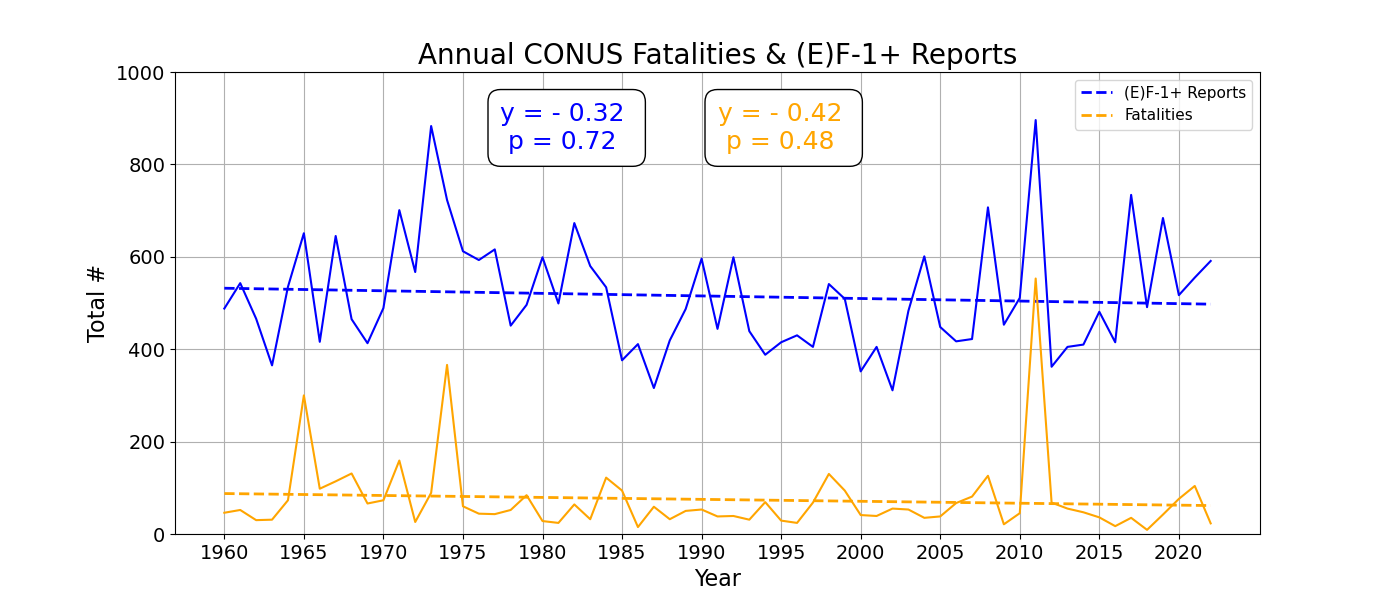

In [5]:
z1 = np.polyfit(Years, reports, 1)
p1 = np.poly1d(z1)
z2 = np.polyfit(Years, fatalities, 1)
p2 = np.poly1d(z2)

fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(Years, reports, color = 'b')
ax1.plot(Years, p1(Years), color='b', label='(E)F-1+ Reports', linewidth=2, linestyle='--')

ax1.plot(Years, fatalities, color = 'orange')
ax1.plot(Years, p2(Years), color='orange', label='Fatalities', linewidth=2, linestyle='--')

ax1.set_xlabel("Year", size ='16')
ax1.set_xticks([1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020])
ax1.set_ylim(0,1000)
ax1.set_ylabel("Total #", fontsize = '16')

ax1.text(.3, .935, 'y = - 0.32 \n p = 0.72', ha='left', va='top', color='b', size=18, transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
ax1.text(.5, .935, 'y = - 0.42 \n p = 0.48', ha='left', va='top', color='orange', size=18, transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.title('Annual CONUS Fatalities & (E)F-1+ Reports', fontsize = '20')
ax1.legend(loc=1, fontsize='11')
ax1.tick_params(labelsize='14')
ax1.grid(which = 'both', axis = 'both')
plt.show()